22 - Denoising microscope images in Python
1.  gaussing
2.  median
3.  non local mean

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
path = r'/content/gdrive/My Drive/Colab Notebooks/screeni_practice'
os.chdir( path )

Mounted at /content/gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from scipy import ndimage as nd
from skimage.restoration import denoise_nl_means, estimate_sigma

[[0.00026475 0.00140172 0.00381028 0.00531767 0.00381028 0.00140172
  0.00026475]
 [0.00140172 0.00742141 0.02017349 0.02815437 0.02017349 0.00742141
  0.00140172]
 [0.00381028 0.02017349 0.05483722 0.07653151 0.05483722 0.02017349
  0.00381028]
 [0.00531767 0.02815437 0.07653151 0.10680833 0.07653151 0.02815437
  0.00531767]
 [0.00381028 0.02017349 0.05483722 0.07653151 0.05483722 0.02017349
  0.00381028]
 [0.00140172 0.00742141 0.02017349 0.02815437 0.02017349 0.00742141
  0.00140172]
 [0.00026475 0.00140172 0.00381028 0.00531767 0.00381028 0.00140172
  0.00026475]]


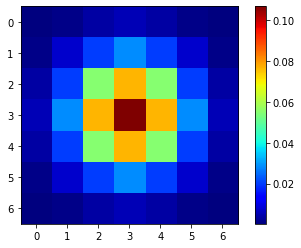

In [ ]:
def gaussian_kernel(size, size_y=None):
  size = int(size)
  if not size_y:
    size_y = size
  else:
    size_y = int(size_y)
  x, y =np.mgrid[-size:size+1, -size_y:size_y+1]
  g = np.exp(-(x**2/float(size)+y**2/float(size_y)))
  return g/g.sum()

gaussian_kernel_array = gaussian_kernel(3)
print(gaussian_kernel_array)
plt.imshow(gaussian_kernel_array, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

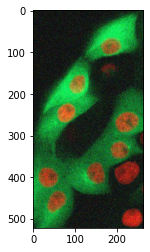

In [ ]:
img = io.imread('images/denoising/noisy_img.jpg')
plt.imshow(img)

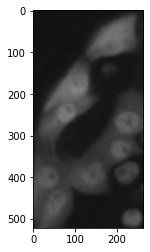

In [ ]:
gaussian_img = nd.gaussian_filter(img, sigma=3)
plt.imsave('images/denoising/gaussian.jpg', gaussian_img)
plt.imshow(gaussian_img)

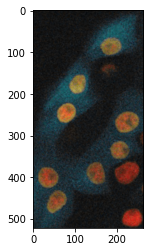

In [ ]:
median_img = nd.median_filter(img, size=3)
plt.imsave('images/denoising/median.jpg', median_img)
plt.imshow(median_img)

<ipython-input-40-3a2aea496c62>:3: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = np.mean(estimate_sigma(img, multichannel=True))
<ipython-input-40-3a2aea496c62>:4: FutureWarning: `multichannel` is a deprecated argument name for `denoise_nl_means`. It will be removed in version 1.0. Please use `channel_axis` instead.
  nlm_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3, multichannel=True)


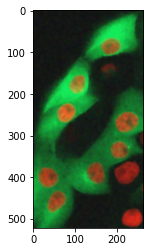

In [ ]:
img = img_as_float(io.imread('images/denoising/noisy_img.jpg'))
# read img as uint8 may be wrong， convert it as float is better
sigma_est = np.mean(estimate_sigma(img, multichannel=True))
nlm_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3, multichannel=True)
plt.imsave('images/denoising/nlm.jpg', nlm_img)
plt.imshow(nlm_img)